## MDP Transition Diagram

#### Number of elements in the state space  (s) = 2
#### Number of elements in the action space (a) = 2

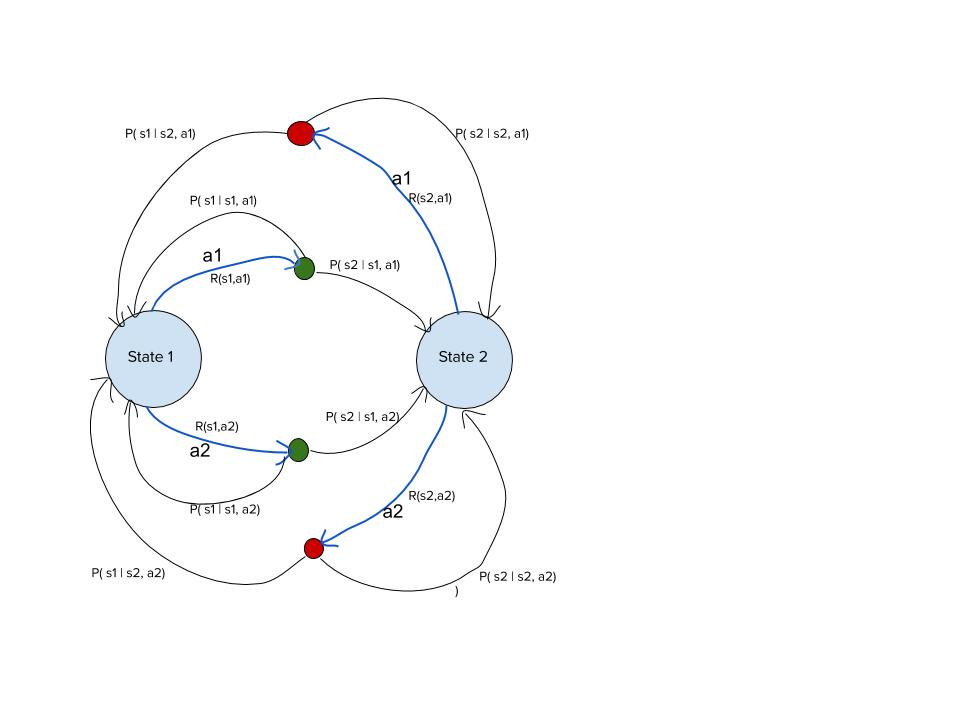

## Import necessary libraries

In [1]:
import numpy as np
import seaborn as sns
sns.set()
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Functions to be implemented
##### 1) Initialize transitions P(S'|S,A) </br>
##### 2) Initialize rewards  R(S,A)</br>
##### 3) Return policy using (x,y)</br>
##### 4) Compute J</br>
##### 5) Plot J</br>


## Initialize transition matrix and rewards matrix here

In [2]:
## Transition probability matrix
def initialize_P():
    p=[[0.4,0.6],[0.15,0.85],[1,0],[0.9,0.1]]     # transition probability matrix of shape (s*a, s)
    return p
   
## Rewards Matrix
def initialize_R():
    r=[1,1,0,0]
    r=np.reshape(r,(-1,1))                      #Reward vector of shape (s*a, 1)
    return r

p=initialize_P()
r=initialize_R()

## Policy pi  
##### Matrix pi of size s x a
pi ( a1|s1 ) = pi[0][0] = x </br>
pi ( a2|s1 ) = pi[0][1] = 1-x </br>
pi ( a1|s2 ) = pi[1][0] = y </br>
pi ( a2|s2 ) = pi[1][1] = 1-y </br>

In [3]:
#function takes x,y and returns a policy vector of dimensions ((|s| x |a|),1)= 4 x 1

def policy(x,y):
    pi=np.array([x,1-x,y,1-y])
    pi=np.reshape(pi,(-1,1))  #converts the matrix to a one single column vector
    return pi


## Compute J = $\rho\$ . V

#### Value function for state 's' under policy 'pi' is given as:
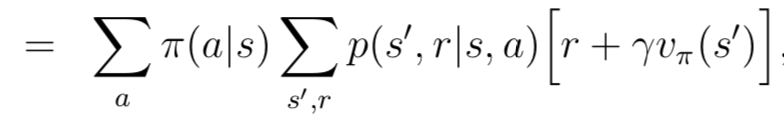
</br>
#### This equation is re-written to the following form, to solve a system of two equations with variables V(1) and V(2):

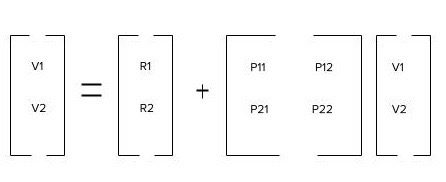

#### Average value under policy pi is then given as : $\Sigma\rho\$iVi

In [4]:
def solve_v(p,r,pi,gamma,rho):
    
    # Computer expected returns vector [R1 R2]
    pr=np.sum(np.reshape(np.multiply(r,pi),(2,2)),axis=1) 
    pr=np.reshape(pr,(-1,1))
    
    # Compute Transition probabilities P(s,s') using P(s'| s,a ) and pi( a|s ) : Matrix of size |s| x |s|
    pi=np.transpose(pi)
    pi2=np.array([pi,pi])
    pi2=np.transpose(pi2)
    pi2=np.reshape(pi2,(-1,1))
    pi_p= np.multiply(pi2,np.reshape(p,(-1,1)))
    pi_p_1= np.reshape(pi_p[:4],(2,2))
    pi_p_2= np.reshape(pi_p[4:],(2,2))
    P_gamma= gamma * np.array([np.sum(pi_p_1,axis=0),np.sum(pi_p_2,axis=0)]) #Include discount factor
    
    # Ax=B  where x= [v1 v2]
    A=np.identity(2)-P_gamma
    B=pr
    
    # [v1 v2] = inverse(A) x (B)
    X= np.dot(np.linalg.inv(A),B)
    
    # J = (p1 * V1) + (p2 * V2)
    J= np.sum(np.multiply(rho,X))
    return J
    
    
    

## Create a mesh of X,Y and Compute Z

In [5]:
x = np.arange(0,1,0.005)         # x= (0, 0.005, 0.01....1)
y = np.arange(0,1,0.005)         # y= (0, 0.005, 0.01....1)
X,Y = np.meshgrid(x, y)         
Z=np.zeros((len(x),len(x)))
rho= np.reshape([0.5,0.5],(-1,1))  #rho is the state probability distribution
m=0
mi=np.empty((1,2),dtype=float)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = solve_v(p,r,policy(x[i],y[j]),0.9,rho)    #Considering Discount factor=0.9
        if(Z[i][j] > m):
            m=Z[i][j]
            mi=[i,j]

In [6]:
np.max(Z)     # Approx Max value of J, across all policies

6.1632076849432895

### Mesh Plot

In [10]:
def plot_3d(X,Y,Z):    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig_size=(10,8)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_zlabel('J', fontsize=30)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.zaxis.label.set_color('black')
    tit= 'State probability distribution = (%0.2f,%0.2f)' %(rho[0],rho[1])
    plt.title(tit)
    plt.rcParams["figure.figsize"] = fig_size
    fig.colorbar(surf, shrink=1, aspect=5)

    plt.show()
    return None

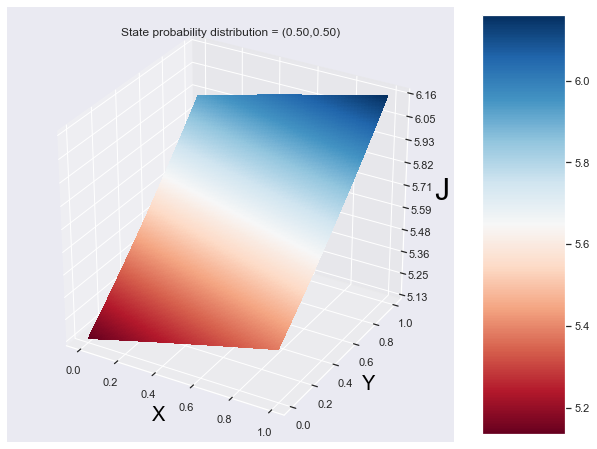

In [11]:
plot_3d(X,Y,Z)